In [0]:
#Import Tools
import pandas as pd
import numpy as np

#Import Combined Dataset and drop columns with NaN Values
df = pd.read_csv("Combined_Data.csv")
df = df.dropna(axis=1)

#Import Industry Class dataset and drop Companies not present in Combined Dataset
col = list(df.columns.tolist())
col.remove(col[0])
col.remove(col[len(col)-1])
in_df = pd.read_csv("industry.csv")
in_df = in_df[in_df['TICKERS'].isin(col)]

In [0]:
#Different industries
industry = in_df.INDUSTRY.unique()

#Seed for reproduction
np.random.seed(49)

#Set to 15-20 stocks over 7 industries
portfolionum = 15

#Samples portfolionum industries
industry_sample = np.random.choice(industry, size=7, replace=False)
industry_sample = industry_sample.tolist()
portfolio_in = industry_sample
portfolionum -= len(industry_sample)
for i in range(portfolionum):
  x = np.random.choice(industry_sample)
  portfolio_in.append(x)

tickers_in = []

print(portfolio_in)

#Samples Tickers from said industries
for x in portfolio_in:
  df1 = in_df.loc[in_df['INDUSTRY'] == x]
  tick = df1['TICKERS'].tolist()
  t = np.random.choice(tick, size=1, replace=False)
  t = t.tolist()
  tickers_in.append(t[0])

print(tickers_in)
ticks = tickers_in

['Pharmaceuticals & Chemicals', 'Travel & Leisure', 'Insurance', 'Financial Institutions', 'Textile', 'Food & Allied', 'Telecommunication', 'Textile', 'Textile', 'Textile', 'Financial Institutions', 'Textile', 'Textile', 'Textile', 'Textile']
['WATACHEM', 'BDSERVICE', 'CENTRALINS', 'IPDC', 'FEKDIL', 'APEXFOODS', 'GP', 'TALLUSPIN', 'RAHIMTEXT', 'RNSPIN', 'BAYLEASING', 'MHSML', 'FAMILYTEX', 'TUNGHAI', 'MALEKSPIN']


In [0]:
#Copies subset of dataframe of Combined Dataset
f_df = df[tickers_in].copy()

table = f_df

table.info()

table.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 15 columns):
WATACHEM      733 non-null float64
BDSERVICE     733 non-null float64
CENTRALINS    733 non-null float64
IPDC          733 non-null float64
FEKDIL        733 non-null float64
APEXFOODS     733 non-null float64
GP            733 non-null float64
TALLUSPIN     733 non-null float64
RAHIMTEXT     733 non-null float64
RNSPIN        733 non-null float64
BAYLEASING    733 non-null float64
MHSML         733 non-null float64
FAMILYTEX     733 non-null float64
TUNGHAI       733 non-null float64
MALEKSPIN     733 non-null float64
dtypes: float64(15)
memory usage: 86.0 KB


,WATACHEM,BDSERVICE,CENTRALINS,IPDC,FEKDIL,APEXFOODS,GP,TALLUSPIN,RAHIMTEXT,RNSPIN,BAYLEASING,MHSML,FAMILYTEX,TUNGHAI,MALEKSPIN
0,213.5,6.3,24.1,18.6,28.0,98.1,364.3,15.5,282.8,27.8,30.7,27.7,22.0,19.9,18.5
1,211.6,6.3,24.2,18.0,27.4,97.8,367.3,15.3,275.0,27.7,30.4,27.8,21.8,19.8,18.4
2,212.5,6.3,24.3,18.1,27.0,99.2,367.4,15.1,278.6,28.3,30.6,28.5,21.8,19.5,18.4
3,209.3,6.3,24.3,18.8,26.6,98.9,365.1,15.1,280.2,28.4,31.3,29.0,21.8,20.3,18.3
4,210.1,6.3,24.1,18.7,26.3,99.3,365.0,15.3,275.5,28.6,31.6,29.1,21.8,20.3,18.2


In [0]:
# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
#print(returns_daily)
returns_annual = returns_daily.mean() * 250
print(returns_annual)

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

WATACHEM      0.144357
BDSERVICE    -0.043369
CENTRALINS    0.047852
IPDC          0.421121
FEKDIL       -0.045507
APEXFOODS     0.208681
GP            0.102502
TALLUSPIN    -0.078011
RAHIMTEXT     0.043968
RNSPIN       -0.093801
BAYLEASING    0.021715
MHSML        -0.047285
FAMILYTEX    -0.295695
TUNGHAI      -0.151800
MALEKSPIN     0.069666
dtype: float64


In [0]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(ticks)
#print(num_assets)
num_portfolios = 1000000

In [0]:
# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets) #5values
    weights /= np.sum(weights)
    #print(weights)
    #print(returns_annual)
    #break
    returns = np.dot(weights, returns_annual) #1value
    #print(returns)
    #break
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights))) #1value
    #print(volatility)
    #break
    sharpe = returns / volatility #1value
    #print(sharpe)
    
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)
    #print(stock_weights)

Text(0.5, 1.0, 'Efficient Frontier')

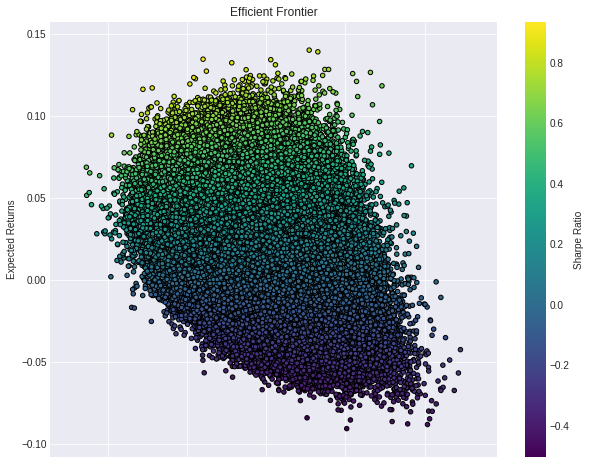

In [0]:
# Commented out IPython magic to ensure Python compatibility.
import matplotlib.pyplot as plt
# %matplotlib inline
# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(ticks):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in ticks]

# reorder dataframe columns
df = df[column_order]
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
#cmap - viridis
#cmap - RdYlGn
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='viridis', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')

In [0]:
df.head(15)

,Returns,Volatility,Sharpe Ratio,WATACHEM Weight,BDSERVICE Weight,CENTRALINS Weight,IPDC Weight,FEKDIL Weight,APEXFOODS Weight,GP Weight,TALLUSPIN Weight,RAHIMTEXT Weight,RNSPIN Weight,BAYLEASING Weight,MHSML Weight,FAMILYTEX Weight,TUNGHAI Weight,MALEKSPIN Weight
0,-0.004585,0.148579,-0.030858,0.073492,0.100006,0.112819,0.003208,0.115514,0.043508,0.068681,0.087643,0.109360,0.028528,0.057667,0.072509,0.068463,0.024502,0.034100
1,0.005006,0.162411,0.030820,0.053773,0.021756,0.061165,0.050413,0.055675,0.086857,0.036747,0.100663,0.083734,0.072724,0.050011,0.103086,0.076693,0.081681,0.065022
2,0.030849,0.157661,0.195668,0.123099,0.003418,0.012224,0.017211,0.039368,0.092126,0.093910,0.088082,0.123340,0.082720,0.040966,0.088923,0.008710,0.088129,0.097774
3,0.049914,0.135183,0.369232,0.088369,0.130058,0.031030,0.067689,0.100159,0.075394,0.131276,0.060753,0.005057,0.034911,0.145031,0.012494,0.023401,0.028204,0.066176
4,-0.020747,0.156270,-0.132764,0.035639,0.133373,0.118696,0.003168,0.025254,0.126376,0.020464,0.087732,0.092874,0.026375,0.004374,0.090635,0.101161,0.110315,0.023565
5,0.005709,0.181291,0.031491,0.111127,0.028639,0.005857,0.012784,0.163393,0.092360,0.002775,0.000083,0.175846,0.046608,0.155350,0.062564,0.094582,0.027204,0.020829
6,0.012046,0.154174,0.078134,0.012293,0.070049,0.080181,0.085010,0.043009,0.086969,0.057235,0.083781,0.088025,0.037869,0.081676,0.075365,0.095422,0.087349,0.015765
7,-0.000268,0.158139,-0.001697,0.132343,0.074392,0.035394,0.047113,0.051518,0.013060,0.048365,0.131619,0.070896,0.055465,0.028441,0.017386,0.038603,0.166344,0.089063
8,0.029732,0.162425,0.183049,0.014975,0.021621,0.093530,0.098273,0.114142,0.072678,0.110020,0.008279,0.021334,0.074872,0.094558,0.014781,0.091959,0.080399,0.088579
9,0.067563,0.147532,0.457953,0.174916,0.141870,0.057592,0.132483,0.007197,0.118549,0.028867,0.131695,0.021415,0.025046,0.003517,0.015496,0.062090,0.055436,0.023833


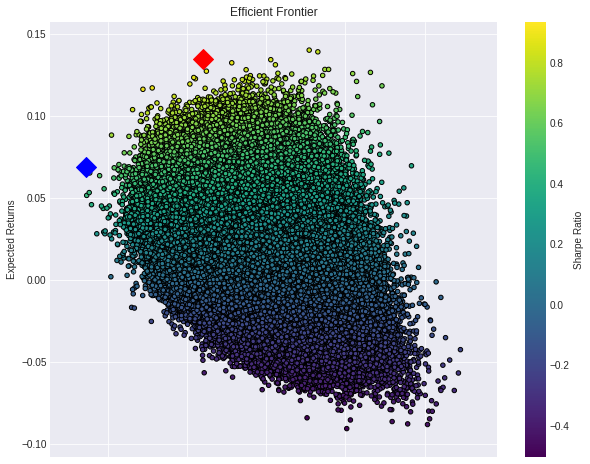

In [0]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()
median_sharpe = df['Sharpe Ratio'].median()
median_volatility = df['Volatility'].median()


# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]
median_sharpe_port = df.loc[df['Sharpe Ratio'].between(median_sharpe, median_sharpe+0.00001, inclusive=False)]
                                                                    


median_vol_port = df.loc[df['Volatility'].between(median_volatility, median_volatility+0.00001, inclusive=False)]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
#cmap - viridis
#cmap - RdYlGn
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='viridis', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)

plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )

plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [0]:
sharpe_portfolio

,Returns,Volatility,Sharpe Ratio,WATACHEM Weight,BDSERVICE Weight,CENTRALINS Weight,IPDC Weight,FEKDIL Weight,APEXFOODS Weight,GP Weight,TALLUSPIN Weight,RAHIMTEXT Weight,RNSPIN Weight,BAYLEASING Weight,MHSML Weight,FAMILYTEX Weight,TUNGHAI Weight,MALEKSPIN Weight
511848,0.134483,0.144049,0.93359,0.140718,0.049993,0.038463,0.166532,0.000055,0.128896,0.164516,0.060213,0.01661,0.042893,0.015774,0.01465,0.00376,0.00394,0.152986


In [0]:
# print the details of the 2 special portfolios
print(min_variance_port.T)
print(sharpe_portfolio.T)

                     718610
Returns            0.068619
Volatility         0.114589
Sharpe Ratio       0.598828
WATACHEM Weight    0.109065
BDSERVICE Weight   0.190235
CENTRALINS Weight  0.066933
IPDC Weight        0.078480
FEKDIL Weight      0.017757
APEXFOODS Weight   0.018619
GP Weight          0.185630
TALLUSPIN Weight   0.030881
RAHIMTEXT Weight   0.106211
RNSPIN Weight      0.000847
BAYLEASING Weight  0.031082
MHSML Weight       0.035044
FAMILYTEX Weight   0.014242
TUNGHAI Weight     0.010070
MALEKSPIN Weight   0.104905
                     511848
Returns            0.134483
Volatility         0.144049
Sharpe Ratio       0.933590
WATACHEM Weight    0.140718
BDSERVICE Weight   0.049993
CENTRALINS Weight  0.038463
IPDC Weight        0.166532
FEKDIL Weight      0.000055
APEXFOODS Weight   0.128896
GP Weight          0.164516
TALLUSPIN Weight   0.060213
RAHIMTEXT Weight   0.016610
RNSPIN Weight      0.042893
BAYLEASING Weight  0.015774
MHSML Weight       0.014650
FAMILYTEX Weight   0